In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("clustering.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               376 non-null object
Married              381 non-null object
Dependents           373 non-null object
Education            381 non-null object
Self_Employed        360 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     370 non-null float64
Credit_History       351 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

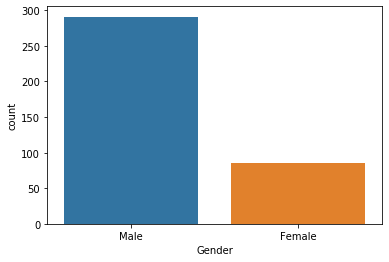

In [5]:
sn.countplot(df.Gender)

In [6]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df.loc[df.Gender == "Male","Gender"].shape

(291,)

In [8]:
df.Gender = df.Gender.fillna("Male")
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df.Dependents.unique()

array(['1', '0', '2', '3+', nan], dtype=object)

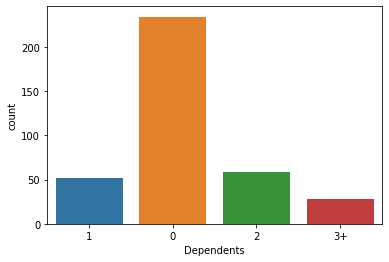

In [10]:
sn.countplot(df.Dependents)

In [11]:
 df.Dependents = df.Dependents.fillna('0')                              # df.loc[df.Dependents =="nan"]="0"
 df.Dependents.unique()   

array(['1', '0', '2', '3+'], dtype=object)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [13]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

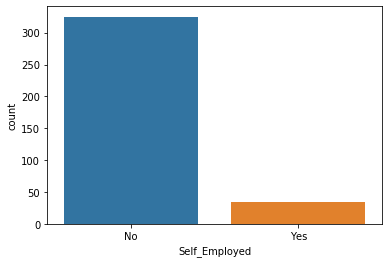

In [14]:
sn.countplot(df.Self_Employed)

In [15]:
df.Self_Employed = df.Self_Employed.fillna("No")

In [16]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

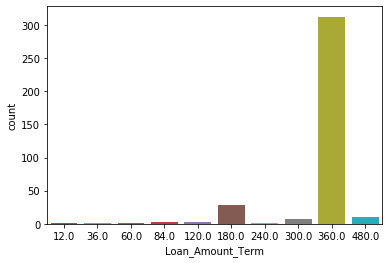

In [17]:
sn.countplot(df.Loan_Amount_Term)

In [18]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [19]:
df.Loan_Amount_Term.shape

(381,)

In [20]:
df.Credit_History.unique()

array([ 1., nan,  0.])

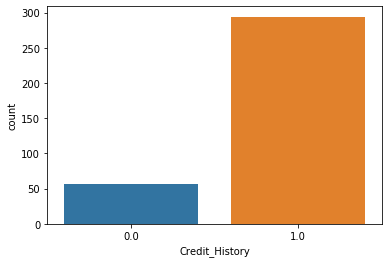

In [21]:
sn.countplot(df.Credit_History)

In [22]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [23]:
df.Credit_History.shape

(381,)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               381 non-null object
Married              381 non-null object
Dependents           381 non-null object
Education            381 non-null object
Self_Employed        381 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     381 non-null float64
Credit_History       381 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [25]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
82,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
68,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y
87,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
357,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N
315,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,Y
217,LP002128,Male,Yes,2,Graduate,No,2583,2330.0,125.0,360.0,1.0,Rural,Y
129,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
178,LP001924,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural,Y
299,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98.0,360.0,1.0,Semiurban,Y
14,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N


In [26]:
df.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [28]:
df = df.drop("Loan_ID",axis = 1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [30]:
lb = LabelEncoder()
df.Gender = lb.fit_transform(df.Gender)
df.Married = lb.fit_transform(df.Married)
df.Education = lb.fit_transform(df.Education)
df.Self_Employed = lb.fit_transform(df.Self_Employed)
df.Property_Area = lb.fit_transform(df.Property_Area)
df.Loan_Status = lb.fit_transform(df.Loan_Status)

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [32]:
scaled = StandardScaler()

df.ApplicantIncome = scaled.fit_transform(df[["ApplicantIncome"]])
df.CoapplicantIncome = scaled.fit_transform(df[["CoapplicantIncome"]])
df.LoanAmount = scaled.fit_transform(df[["LoanAmount"]])
df.Loan_Amount_Term = scaled.fit_transform(df[["Loan_Amount_Term"]])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,0.707469,0.098695,0.812575,0.275147,1.0,0,0
1,1,1,0,0,1,-0.408932,-0.546371,-1.376596,0.275147,1.0,2,1
2,1,1,0,1,0,-0.703019,0.462294,0.530102,0.275147,1.0,2,1
3,1,0,0,0,0,1.706799,-0.546371,1.271595,0.275147,1.0,2,1
4,1,1,0,1,0,-0.879330,0.102118,-0.352629,0.275147,1.0,2,1


In [34]:
corr = df.corr()  # Correlation between features
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.358371,0.113260,-0.004182,0.034817,0.108013,0.054512,-0.116080,0.022685,0.003741,0.020302
Married,0.358371,1.000000,0.040532,0.001022,-0.043796,0.081431,0.142164,-0.137874,0.031676,0.034601,0.092473
Education,0.113260,0.040532,1.000000,0.031469,-0.035147,-0.042834,-0.011820,-0.091875,0.006784,-0.086582,-0.055586
Self_Employed,-0.004182,0.001022,0.031469,1.000000,0.226549,-0.065167,0.026137,-0.062648,0.031495,-0.033116,-0.017947
ApplicantIncome,0.034817,-0.043796,-0.035147,0.226549,1.000000,-0.248693,0.270681,-0.105694,-0.002988,-0.064762,-0.010167
CoapplicantIncome,0.108013,0.081431,-0.042834,-0.065167,-0.248693,1.000000,0.114936,0.002496,0.025058,0.010931,0.009017
LoanAmount,0.054512,0.142164,-0.011820,0.026137,0.270681,0.114936,1.000000,0.121807,-0.046443,-0.165424,0.041220
Loan_Amount_Term,-0.116080,-0.137874,-0.091875,-0.062648,-0.105694,0.002496,0.121807,1.000000,-0.023884,-0.094657,-0.049748
Credit_History,0.022685,0.031676,0.006784,0.031495,-0.002988,0.025058,-0.046443,-0.023884,1.000000,0.037731,0.609630
Property_Area,0.003741,0.034601,-0.086582,-0.033116,-0.064762,0.010931,-0.165424,-0.094657,0.037731,1.000000,0.057834


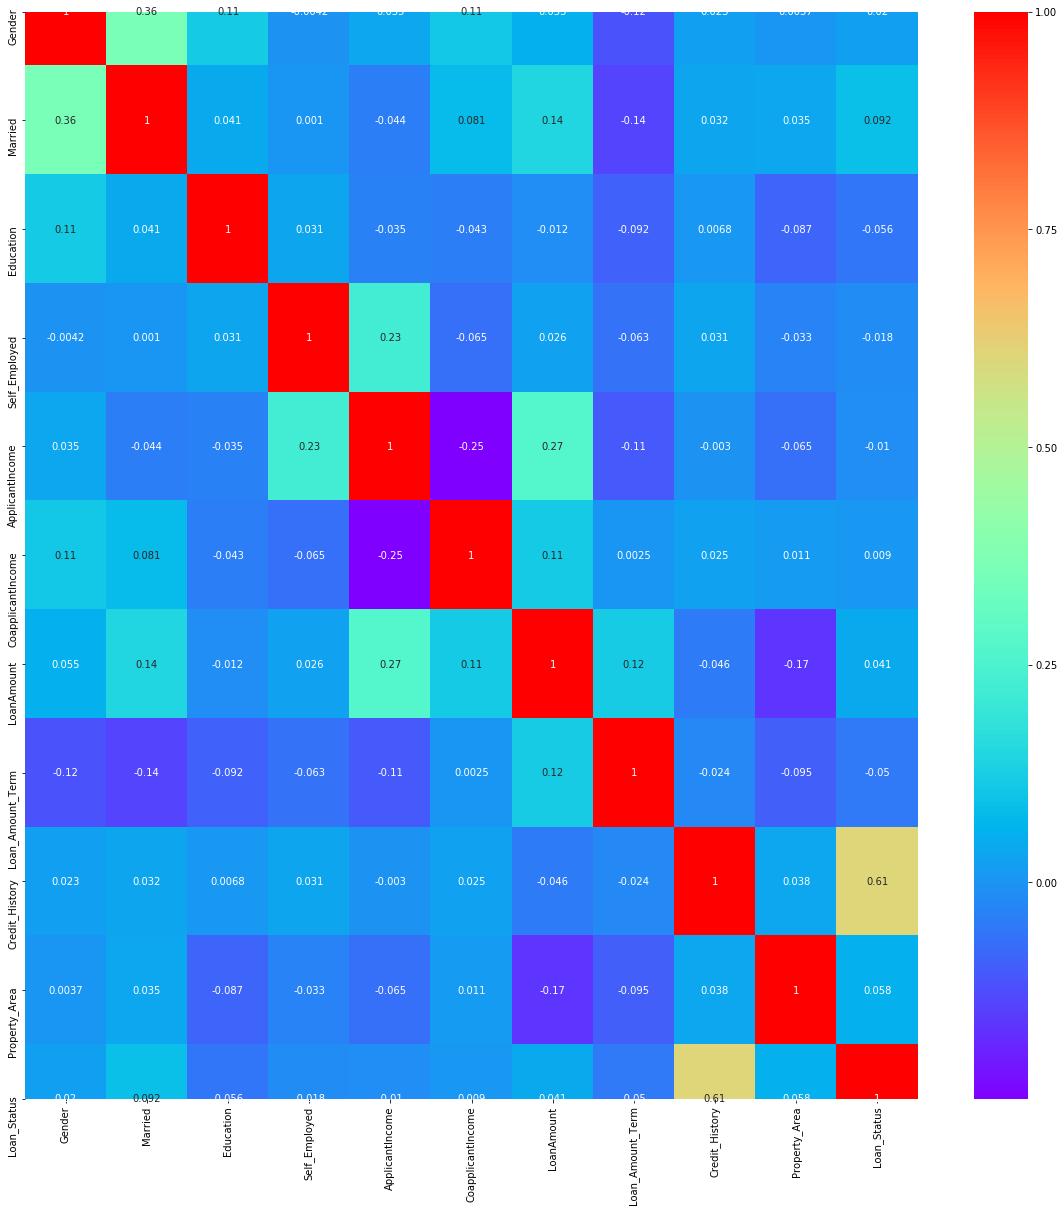

In [35]:
plt.figure(figsize=(20,20))
sn.heatmap(corr,annot = True,cmap = "rainbow")

In [44]:
x = df.drop(["Loan_Status"],axis = 1)
y = df.Loan_Status

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

## RandomForest Model

In [46]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df.Dependents.unique()

In [40]:
from  collections import Counter

In [41]:
Counter(df.Dependents)

Counter({'1': 52, '0': 242, '2': 59, '3+': 28})

In [42]:
df.loc[df.Dependents == "3+","Dependents"] ='3'

In [43]:
df.Dependents.unique()

array(['1', '0', '2', '3'], dtype=object)